### Import 

In [194]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns 
import matplotlib.pyplot as plt 
from tqdm import tqdm 

# machine learning 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor

import pickle

In [195]:
df = pd.read_csv('../data/preprocessed_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Encoding : 

In [197]:
genderEncoder = preprocessing.LabelEncoder()
df['gender']= genderEncoder.fit_transform(df['gender'])

PartnerEncoder = preprocessing.LabelEncoder()
df['Partner']= PartnerEncoder.fit_transform(df['Partner'])

DependentsEncoder = preprocessing.LabelEncoder()
df['Dependents']= DependentsEncoder.fit_transform(df['Dependents'])

MultipleLinesEncoder = preprocessing.LabelEncoder()
df['MultipleLines']= MultipleLinesEncoder.fit_transform(df['MultipleLines'])

InternetServiceEncoder = preprocessing.LabelEncoder()
df['InternetService']= InternetServiceEncoder.fit_transform(df['InternetService'])

OnlineSecurityEncoder = preprocessing.LabelEncoder()
df['OnlineSecurity']= OnlineSecurityEncoder.fit_transform(df['OnlineSecurity'])

OnlineBackupEncoder = preprocessing.LabelEncoder()
df['OnlineBackup']= OnlineBackupEncoder.fit_transform(df['OnlineBackup'])

DeviceProtectionEncoder = preprocessing.LabelEncoder()
df['DeviceProtection']= DeviceProtectionEncoder.fit_transform(df['DeviceProtection'])

PhoneServiceEncoder = preprocessing.LabelEncoder()
df['PhoneService']= PhoneServiceEncoder.fit_transform(df['PhoneService'])

TechSupportEncoder = preprocessing.LabelEncoder()
df['TechSupport']= TechSupportEncoder.fit_transform(df['TechSupport'])

StreamingTVEncoder = preprocessing.LabelEncoder()
df['StreamingTV']= StreamingTVEncoder.fit_transform(df['StreamingTV'])

StreamingMoviesEncoder = preprocessing.LabelEncoder()
df['StreamingMovies']= StreamingMoviesEncoder.fit_transform(df['StreamingMovies'])

ContractEncoder = preprocessing.LabelEncoder()
df['Contract']= ContractEncoder.fit_transform(df['Contract'])

PaperlessBillingEncoder = preprocessing.LabelEncoder()
df['PaperlessBilling']= PaperlessBillingEncoder.fit_transform(df['PaperlessBilling'])

PaymentMethodEncoder = preprocessing.LabelEncoder()
df['PaymentMethod']= PaymentMethodEncoder.fit_transform(df['PaymentMethod'])

ChurnEncoder = preprocessing.LabelEncoder()
df['Churn']= ChurnEncoder.fit_transform(df['Churn'])

In [198]:
X = df.drop(['Churn', 'customerID'], axis = 1)
y = df['Churn']

## Correlation :

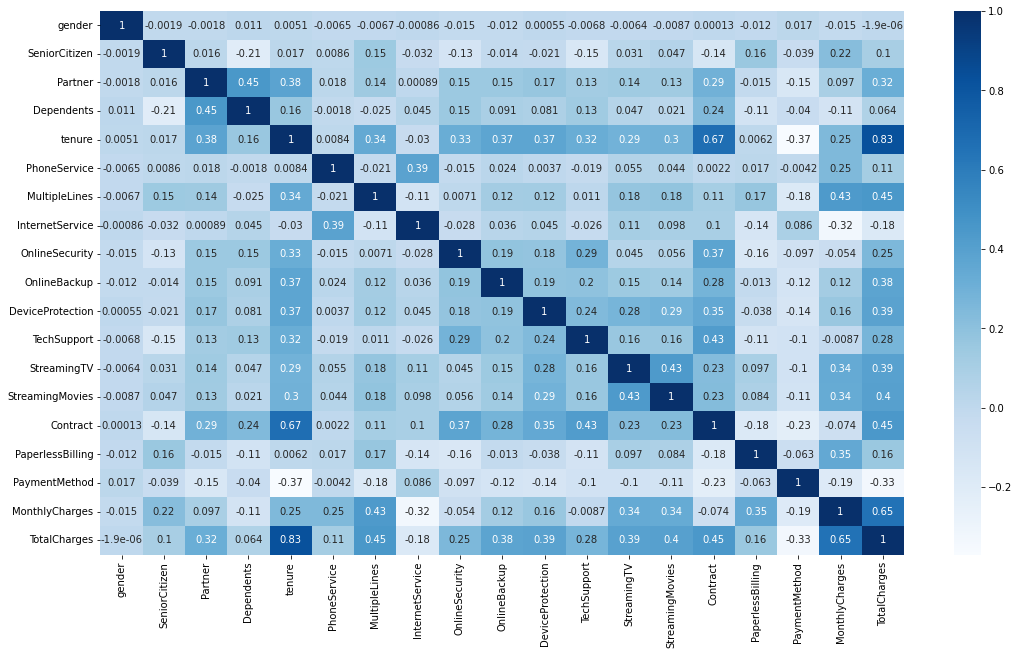

In [199]:
plt.figure(figsize=(18,10))
sns.heatmap(X.corr(), annot= True, cmap = 'Blues');

In [200]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]    
                col_corr.add(colname)
    return col_corr

In [201]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

1

In [202]:
corr_features

{'TotalCharges'}

In [203]:
X.drop(corr_features,axis=1, inplace = True)

### Feature Importance 

In [204]:
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.04265655 0.03084755 0.03835824 0.03016079 0.18739545 0.006688
 0.02604064 0.03189293 0.05336588 0.03105705 0.03060475 0.04072126
 0.02523542 0.02609388 0.13354441 0.03464578 0.07113865 0.15955278]


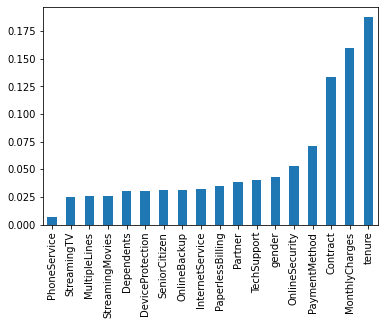

In [205]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns).sort_values()
feature_importances.plot(kind='bar')
plt.show();

## Scaling 

In [206]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

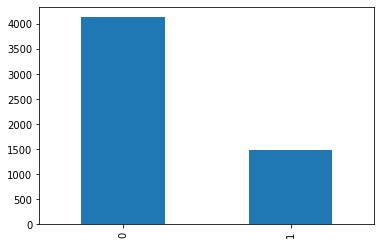

In [207]:
y_train.value_counts().plot(kind = 'bar');

In [208]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [209]:
print('count of 0 --> ', list(y_train_res).count(0), 'count of 1 -->', list(y_train_res).count(1))
print('shape of x_train --> ', len(list(x_train_res)))

count of 0 -->  4138 count of 1 --> 4138
shape of x_train -->  18


In [210]:
from sklearn.feature_selection import VarianceThreshold 

v_threshold = VarianceThreshold(threshold=0.1)
v_threshold.fit(x_train_res)
v_threshold.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [211]:
columns = [X.columns[i] for i in range(len(X.columns)) if v_threshold.get_support()[i] == False]
columns

['PhoneService']

In [212]:
current_columns = list(X.columns)
current_columns.remove('PhoneService')
print(current_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']


In [213]:
x_train_res = v_threshold.transform(x_train_res)
x_test = v_threshold.transform(x_test)

print(x_train_res.shape)

(8276, 17)


In [214]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [215]:
lr = LogisticRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select=6)
sfs.fit(x_train_res, y_train_res)
sfs.get_support()

array([False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True, False, False,  True])

In [216]:
columns = [current_columns[i] for i in range(len(current_columns)) if sfs.get_support()[i] == True]
columns

['Dependents',
 'InternetService',
 'OnlineSecurity',
 'StreamingTV',
 'Contract',
 'MonthlyCharges']

In [217]:
x_train_res = sfs.transform(x_train_res)
x_test = sfs.transform(x_test)

print(x_train_res.shape)

(8276, 6)


In [218]:
scaler = StandardScaler() 
x_train_res = scaler.fit_transform(x_train_res)
x_test = scaler.transform(x_test)

In [219]:
# # Applying PCA
# from sklearn.decomposition import PCA
# pca = PCA(0.95)
# x_train_res_pca = pca.fit_transform(x_train_res)
# x_test_pca = pca.transform(x_test)
# explained_variance = pca.explained_variance_ratio_
# print(sum(explained_variance))

In [220]:
data = {}

data['x_train'] = x_train_res 
data['x_test'] = x_test
data['y_train'] = y_train_res 
data['y_test'] = y_test

data['x_feature'] = columns
data['y_feature'] = 'Churn'

In [221]:
root = '../data/ML_models/'

file = open(root+'model_data.pkl', 'wb')
pickle.dump(data, file)
file.close()

scaler_file = open(root+'StandardScaler.pkl', 'wb')
pickle.dump(scaler, scaler_file)
scaler_file.close()

PartnerEncoder_file = open(root+'PartnerEncoder.pkl', 'wb')
pickle.dump(PartnerEncoder, PartnerEncoder_file)
PartnerEncoder_file.close()

DependentsEncoder_file = open(root+'DependentsEncoder.pkl', 'wb')
pickle.dump(DependentsEncoder, DependentsEncoder_file)
DependentsEncoder_file.close()

MultipleLinesEncoder_file = open(root+'MultipleLinesEncoder.pkl', 'wb')
pickle.dump(MultipleLinesEncoder, MultipleLinesEncoder_file)
MultipleLinesEncoder_file.close()

InternetServiceEncoder_file = open(root+'InternetServiceEncoder.pkl', 'wb')
pickle.dump(InternetServiceEncoder, InternetServiceEncoder_file)
InternetServiceEncoder_file.close()

PhoneServiceEncoder_file = open(root+'PhoneServiceEncoder.pkl', 'wb')
pickle.dump(PhoneServiceEncoder, PhoneServiceEncoder_file)
PhoneServiceEncoder_file.close()

OnlineSecurityEncoder_file = open(root+'OnlineSecurityEncoder.pkl', 'wb')
pickle.dump(OnlineSecurityEncoder, OnlineSecurityEncoder_file)
OnlineSecurityEncoder_file.close()

OnlineBackupEncoder_file = open(root+'OnlineBackupEncoder.pkl', 'wb')
pickle.dump(OnlineBackupEncoder, OnlineBackupEncoder_file)
OnlineBackupEncoder_file.close()

DeviceProtectionEncoder_file = open(root+'DeviceProtectionEncoder.pkl', 'wb')
pickle.dump(DeviceProtectionEncoder, DeviceProtectionEncoder_file)
DeviceProtectionEncoder_file.close()

TechSupportEncoder_file = open(root+'TechSupportEncoder.pkl', 'wb')
pickle.dump(TechSupportEncoder, TechSupportEncoder_file)
TechSupportEncoder_file.close()

StreamingTVEncoder_file = open(root+'StreamingTVEncoder.pkl', 'wb')
pickle.dump(StreamingTVEncoder, StreamingTVEncoder_file)
StreamingTVEncoder_file.close()

StreamingMoviesEncoder_file = open(root+'StreamingMoviesEncoder.pkl', 'wb')
pickle.dump(StreamingMoviesEncoder, StreamingMoviesEncoder_file)
StreamingMoviesEncoder_file.close()

ContractEncoder_file = open(root+'ContractEncoder.pkl', 'wb')
pickle.dump(ContractEncoder, ContractEncoder_file)
ContractEncoder_file.close()

PaperlessBillingEncoder_file = open(root+'PaperlessBillingEncoder.pkl', 'wb')
pickle.dump(PaperlessBillingEncoder, PaperlessBillingEncoder_file)
PaperlessBillingEncoder_file.close()

PaymentMethodEncoder_file = open(root+'PaymentMethodEncoder.pkl', 'wb')
pickle.dump(PaymentMethodEncoder, PaymentMethodEncoder_file)
PaymentMethodEncoder_file.close()

ChurnEncoder_file = open(root+'ChurnEncoder.pkl', 'wb')
pickle.dump(ChurnEncoder, ChurnEncoder_file)
ChurnEncoder_file.close()